In [1]:
from xgboost import XGBClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint as sp_randint
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve
import time

sns.set(style='white', context='notebook', palette='deep')


/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv("data_train.csv")

In [3]:
data.head()

,id,num1,num2,num3,num4,num5,num6,num7,num8,num9,...,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,target
0,0,2,5,0,1,0,0,0,0,0,...,NaN,0,1.0,4,1.0,0,0.0,1,12,0
1,1,1,7,0,0,1,0,0,0,0,...,NaN,0,NaN,11,1.0,1,2.0,1,19,0
2,2,5,9,0,0,1,0,0,0,0,...,NaN,0,NaN,14,1.0,1,2.0,1,60,0
3,3,0,2,1,0,0,0,0,0,0,...,0.0,0,1.0,11,1.0,1,3.0,1,104,0
4,4,0,0,1,0,0,0,0,0,0,...,NaN,0,NaN,14,1.0,1,2.0,1,82,0


In [4]:
data.isnull().sum()

id             0
num1           0
num2           0
num3           0
num4           0
num5           0
num6           0
num7           0
num8           0
num9           0
num10          0
num11          0
num12          0
num13          0
num14          0
num15          0
num16          0
num17          0
num18     107909
num19          5
num20          1
num21          0
num22      42667
num23          0
der1           0
der2           0
der3           0
der4           0
der5           0
der6           0
der7           0
der8           0
der9           0
der10          0
der11          0
der12          0
der13          0
der14          0
der15          0
der16          0
der17          0
der18          0
der19          0
cat1         217
cat2          83
cat3        5814
cat4         107
cat5           5
cat6      411792
cat7           0
cat8      266928
cat9           0
cat10      11503
cat11          0
cat12        570
cat13          0
cat14          0
target         0
dtype: int64

In [5]:
for i in data.columns:
    if data[i].isnull().sum() > 0 :
        print(i)
        print(data[i].describe())
        print("**"*10)

num18
count    488091.000000
mean          0.894025
std           0.345393
min           0.061237
25%           0.633443
50%           0.801561
75%           1.083974
max           4.037945
Name: num18, dtype: float64
********************
num19
count    595995.000000
mean          2.346109
std           0.832505
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: num19, dtype: float64
********************
num20
count    595999.000000
mean          0.379944
std           0.058299
min           0.100000
25%           0.316228
50%           0.374166
75%           0.400000
max           1.264911
Name: num20, dtype: float64
********************
num22
count    553333.000000
mean          0.374691
std           0.045607
min           0.109545
25%           0.350428
50%           0.373497
75%           0.398121
max           0.636396
Name: num22, dtype: float64
********************
cat1
count    595783.000000
mean          1.

In [6]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        data[i].fillna(data[i].mean(),inplace = True)

In [7]:
data.isnull().sum()

id        0
num1      0
num2      0
num3      0
num4      0
num5      0
num6      0
num7      0
num8      0
num9      0
num10     0
num11     0
num12     0
num13     0
num14     0
num15     0
num16     0
num17     0
num18     0
num19     0
num20     0
num21     0
num22     0
num23     0
der1      0
der2      0
der3      0
der4      0
der5      0
der6      0
der7      0
der8      0
der9      0
der10     0
der11     0
der12     0
der13     0
der14     0
der15     0
der16     0
der17     0
der18     0
der19     0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
target    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596000 entries, 0 to 595999
Data columns (total 58 columns):
id        596000 non-null int64
num1      596000 non-null int64
num2      596000 non-null int64
num3      596000 non-null int64
num4      596000 non-null int64
num5      596000 non-null int64
num6      596000 non-null int64
num7      596000 non-null int64
num8      596000 non-null int64
num9      596000 non-null int64
num10     596000 non-null int64
num11     596000 non-null int64
num12     596000 non-null int64
num13     596000 non-null int64
num14     596000 non-null int64
num15     596000 non-null int64
num16     596000 non-null float64
num17     596000 non-null float64
num18     596000 non-null float64
num19     596000 non-null float64
num20     596000 non-null float64
num21     596000 non-null float64
num22     596000 non-null float64
num23     596000 non-null float64
der1      596000 non-null float64
der2      596000 non-null float64
der3      596000 non-null float64
der

In [9]:
data["target"] = data["target"].astype(int)
labels = data["target"]
train = data.drop(labels = ["target","id"], axis = 1)

In [10]:
train.head()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14
0,2,5,0,1,0,0,0,0,0,0,...,1.0,0.601744,0,1.000000,4,1.0,0,0.0,1,12
1,1,7,0,0,1,0,0,0,0,0,...,1.0,0.601744,0,0.525365,11,1.0,1,2.0,1,19
2,5,9,0,0,1,0,0,0,0,0,...,1.0,0.601744,0,0.525365,14,1.0,1,2.0,1,60
3,0,2,1,0,0,0,0,0,0,0,...,1.0,0.000000,0,1.000000,11,1.0,1,3.0,1,104
4,0,0,1,0,0,0,0,0,0,0,...,1.0,0.601744,0,0.525365,14,1.0,1,2.0,1,82


In [11]:
kfold = StratifiedKFold(n_splits=10)

In [12]:
random_state = 2
classifiers = []

classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier())
classifiers.append(GaussianNB())


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')
took 0.9668100516001383 minutes
----------------------------------------------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best'),
          learning_rate=0.1, n_estimators=50, random_state=2)
took 1.2624406894048055 minutes
-------------

/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are

took 0.3350769480069478 minutes
----------------------------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

took 4.389697368939718 minutes
----------------------------------------------------------------------------------------------------
GaussianNB(priors=None)
took 0.12395081917444865 minutes
----------------------------------------------------------------------------------------------------
whole snippet took 30.818559229373932 minutes


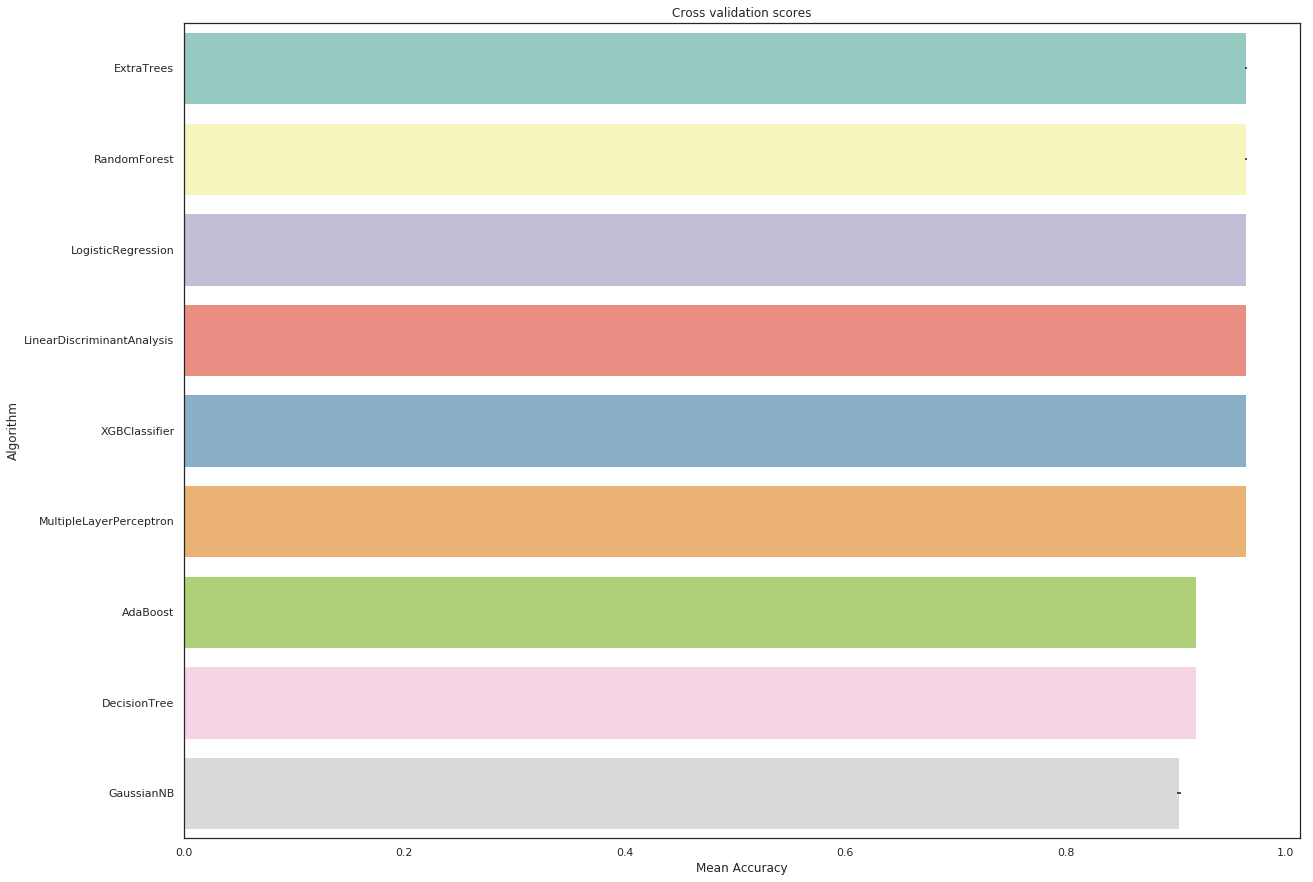

In [13]:
start1 = time.time()
cv_results = []
for classifier in classifiers:
    start2 =time.time()
    print(classifier)
    cv_results.append(cross_val_score(classifier,train,y = labels,scoring = "accuracy",cv=kfold,n_jobs=-1))
    print("took {} minutes".format((time.time() - start2)/60 ))
    print("-"*100)
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","MultipleLayerPerceptron","LogisticRegression","LinearDiscriminantAnalysis","XGBClassifier","GaussianNB"]})
cv_res.sort_values(by = ['CrossValMeans'], ascending = False, inplace = True)
plt.subplots(figsize=(20,15))
g= sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print("whole snippet took {} minutes".format((time.time()-start1)/60))

## HYperparameter Tunning for top models 
## Random Forest, Extra Trees, MLP, XGB Classifier, Adaboost


In [14]:
startada = time.time()
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

rsadaDTC = RandomizedSearchCV(adaDTC,param_distributions = ada_param_grid, n_iter = 15, scoring="accuracy", verbose = 1,n_jobs =-1)

rsadaDTC.fit(train,labels)

ada_best = rsadaDTC.best_estimator_

print("Best Score is {}".format(rsadaDTC.best_score_))
print("took {} mins".format((time.time()-startada)/60))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.4min finished


Best Score is 0.9232885906040268
took 2.9763349056243897 mins


In [15]:
#ExtraTrees 
startex = time.time()
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": sp_randint(1,10),
              "min_samples_split": sp_randint(2,10),
              "min_samples_leaf": sp_randint(1, 3, 10),
              "bootstrap": [False],
              "n_estimators" :sp_randint(100,300),
              "criterion": ["gini"]}


rsExtC = RandomizedSearchCV(ExtC,param_distributions = ex_param_grid, n_iter = 15, scoring="accuracy", verbose = 1,n_jobs =-1)

rsExtC.fit(train,labels)

ExtC_best = rsExtC.best_estimator_

# Best score
print("Mean Score is {}".format(rsExtC.best_score_))
print("took {} mins".format((time.time()-startex)/60))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 34.2min finished


Mean Score is 0.9635637583892618
took 39.683384239673615 mins


In [16]:
# RFC Parameters tunning 
startrfc = time.time()
RFC = RandomForestClassifier()


## Search grid for optimal parameters[Parallel(n_jobs=4)]: Done  42 tasks     
rf_param_grid = {"max_depth": [None],
              "max_features": sp_randint(1,10),
              "min_samples_split": sp_randint(2,10),
              "min_samples_leaf": sp_randint(1, 3, 10),
              "bootstrap": [False],
              "n_estimators" :sp_randint(100,300),
              "criterion": ["gini"]}


rsRFC = RandomizedSearchCV(RFC,param_distributions = rf_param_grid, n_iter=15, scoring="accuracy", verbose = 1,n_jobs =-1)

rsRFC.fit(train,labels)

RFC_best = rsRFC.best_estimator_

# Best score
print("Mean Score is {}".format(rsRFC.best_score_))
print("took {} mins".format((time.time()-startrfc)/60))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 57.5min finished


Mean Score is 0.9635637583892618
took 66.56019892692566 mins


In [17]:
#XGB Classifier
startxgb = time.time()
XGB = XGBClassifier()


xgb_param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

rsXGB = RandomizedSearchCV(XGB,param_distributions = xgb_param_grid, cv=kfold, scoring="accuracy", verbose = 1,n_jobs =-1)

rsXGB.fit(train,labels)

XGB_best = rsXGB.best_estimator_

# Best score
print("Mean Score is {}".format(rsXGB.best_score_))
print("took {} mins".format((time.time()-startxgb)/60))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

Mean Score is 0.9635637583892618
took 40.47445751825968 mins


In [20]:
startMLP =time.time()
MLP = MLPClassifier()
MLP_param_grid = { "solver":["adam","sgd"],
                  "activation":["tanh","relu"],
                  "learning_rate":["constant","invscaling","adaptive"],
                  "learning_rate_init":[0.01,0.03,0.05,0.1],
                  "max_iter":sp_randint(200,300)
                  
                 }
rsMLP = RandomizedSearchCV(MLP,param_distributions = MLP_param_grid, n_iter =15, scoring="accuracy", verbose = 1,n_jobs =-1)

rsMLP.fit(train,labels)

rsMLP_best = rsMLP.best_estimator_

print("Mean Score is {}".format(rsMLP.best_score_))
print("took {} mins".format((time.time()-startMLP)/60))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 43.3min finished


Mean Score is 0.9635637583892618
took 43.570611524581906 mins


/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of

took 106.645863087972 mins


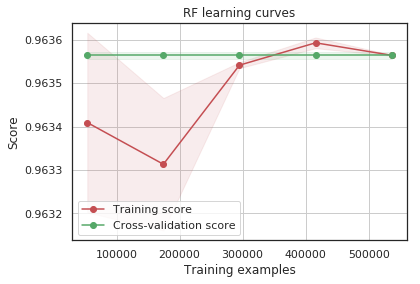

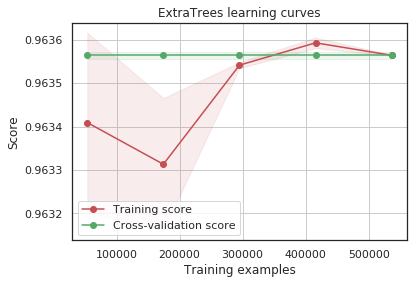

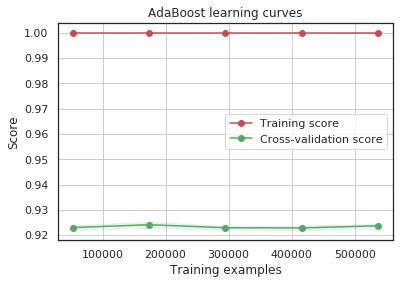

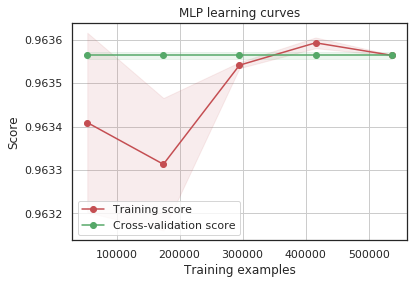

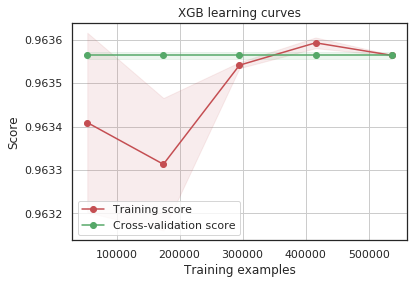

In [21]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

startplot = time.time()

g = plot_learning_curve(rsRFC.best_estimator_,"RF learning curves",train,labels,cv=kfold)
g = plot_learning_curve(rsExtC.best_estimator_,"ExtraTrees learning curves",train,labels,cv=kfold)
g = plot_learning_curve(rsadaDTC.best_estimator_,"AdaBoost learning curves",train,labels,cv=kfold)
g = plot_learning_curve(rsMLP.best_estimator_,"MLP learning curves",train,labels,cv=kfold)
g = plot_learning_curve(rsXGB.best_estimator_,"XGB learning curves",train,labels,cv=kfold)
print("took {} mins".format((time.time()-startplot)/60))

In [23]:
startvc = time.time()
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best)
, ('adac',ada_best),('mlp',rsMLP_best), ('xgb', XGB_best)], voting='soft',n_jobs = -1)

votingC = votingC.fit(train, labels)
#x = cross_val_score(votingC,train,y = labels,scoring = "accuracy",cv=kfold)
#print("Mean accuracy is  {}".format(x.mean()))
print("took {} mins".format((time.time()-startvc)/60))

took 9.822081673145295 mins


In [24]:
test_data =pd.read_csv("data_test.csv")

In [25]:
for i in test_data.columns:
    if test_data[i].isnull().sum() > 0:
        test_data[i].fillna(data[i].mean(),inplace = True)

test_data.isnull().sum()

id       0
num1     0
num2     0
num3     0
num4     0
num5     0
num6     0
num7     0
num8     0
num9     0
num10    0
num11    0
num12    0
num13    0
num14    0
num15    0
num16    0
num17    0
num18    0
num19    0
num20    0
num21    0
num22    0
num23    0
der1     0
der2     0
der3     0
der4     0
der5     0
der6     0
der7     0
der8     0
der9     0
der10    0
der11    0
der12    0
der13    0
der14    0
der15    0
der16    0
der17    0
der18    0
der19    0
cat1     0
cat2     0
cat3     0
cat4     0
cat5     0
cat6     0
cat7     0
cat8     0
cat9     0
cat10    0
cat11    0
cat12    0
cat13    0
cat14    0
dtype: int64

In [26]:
test = test_data.drop(labels = ["id"], axis = 1)
test.head()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14
0,0,8,0,1,0,0,0,0,0,0,...,1.0,0.601744,0,0.525365,1,1.0,1,2.0,1,65
1,4,5,0,0,0,1,0,0,0,0,...,1.0,0.601744,0,0.000000,11,1.0,1,0.0,1,103
2,5,3,0,0,0,1,0,0,0,0,...,1.0,0.601744,0,0.525365,14,1.0,1,2.0,1,29
3,0,6,1,0,0,0,0,0,0,0,...,1.0,0.601744,0,0.525365,1,1.0,1,2.0,1,40
4,5,7,0,0,0,1,0,0,0,0,...,1.0,0.601744,0,0.525365,11,1.0,1,2.0,1,101


In [28]:
starttest= time.time()
test_target = pd.Series(votingC.predict(test), name="target")

results = pd.concat([test_data.id,test_target],axis=1)

results.to_csv("quartic_ensemble_voting.csv",index=False)
print("took {} mins".format((time.time()-starttest)/60))

/home/saklaniayush99/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


took 3.018851367632548 mins


In [30]:
test_res = pd.read_csv("quartic_ensemble_voting.csv")
test_res.head(15)

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,8,0
8,10,0
9,11,0


## Questions


### Briefly describe the conceptual approach you chose! What are the trade-offs?


My approcah was to first analyze the data and see how much values are missing and what type of data it is. After that I checked if data has large deviation or notto decide how to fill the missing values. I tested cross validation predictions on approximately 10 classifiers and after checking their accuracy decided to use 5 Classifiers ensembled in voting classifier to predict the class. I used cross validation so that overfitting can be minimized. Selecting the 5 models above, I used RandomSearchCV to determine best parameters before prediciting the classes. I used RandomSearch because the size of data set is too large and it has too many features so RandomSearch will provide the approximated same result as that of  GridSearchCv and it is fast too. For accuracy mean squared error (default) is used.
Trade-offs are that It is not clear how derived feature depend on simple features so it will be difficult to do feature engineering. And in some features there were to many values missing approximately all the values were missing. 

#### What's the model performance? What is the complexity? Where are the bottlenecks?



Cross validation scores are very good in some classifiers ranging upto 96%.The biggest bottleneck is the too many missing vales in some features as it can alter the performance of the model.


#### If you had more time, what improvements would you make, and in what order of priority?

If I had more time, I would have analyzed data more and tried to check if there's any relation between derived features and normal features and how they affect the target.
Then after that I would have tried different preprocessing steps like Standardization, Normalization.
I would have tried other accuracy meterics such as Recall and precision. 
After that I would have checked some more models and if they perform better than would have used them in the voting classifier.